Different Imputation methods:
1) https://www.scrna-tools.org/tools?sort=name&cats=Imputation
2) https://github.com/scRNA-tools/scRNA-tools
3) From Literatures:
   a) SAVER b) scImpute c) deepImpute d) PRIME e) bayNorm f) KNN-smoothing
   g) McImpute h) scrabble i) scRMD j) Mcimpute-block k) FEATS

Implemented Imputation Methods:
1) MAGIC
2) Similar like ALRA
3) KNN Imputation


Failed Imputation Methods:
1) scVI (Takes too much time as well as installation issues)
2) DCA (installation issue)
3) CarDEC (installation issue)
4) AutoImpute (takes too much time and crashes even for singleimpute of this method)~ https://kearnz.github.io/autoimpute-tutorials/
5)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title installing packages
!pip install scanpy
!pip install magic-impute
!pip install igraph
!pip3 install leidenalg
# !pip install -U scvi-tools
# !pip install scArches
# !pip install dca
!pip install autoimpute

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not curr

In [ ]:
# !pip uninstall pandas -y
# !pip install pandas
# !pip install mizani
# !pip install xarray
# !pip install plotnine
# !pip install google-colab

Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scprep 1.2.3 requires pandas<2.1,>=0.25, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into accou

In [ ]:
# !pip install --upgrade --force-reinstall pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17

In [ ]:
# !pip install numpy==2.0.0 # Downgrade NumPy to version 2.0.0

  Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scprep 1.2.3 requires pandas<2.1,>=0.25, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
# @title importing packages
import os
import torch
import numpy as np
import pandas as pd
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time
import psutil
from sklearn.impute import KNNImputer
from scipy.sparse.linalg import svds
# import scvi
# import scarches as sca
# import dca
import tracemalloc
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import issparse
from scipy.sparse.linalg import svds
import magic

In [17]:
# @title Imputation Evaluator

class ImputationEvaluator:
    def __init__(self, dataset_path, n_top_genes=2000):
        self.dataset_path = dataset_path
        self.dataset_name = os.path.basename(dataset_path)

        if n_top_genes == 'all':
            self.n_top_genes = None
        else:
            self.n_top_genes = int(n_top_genes)

        self.load_data()

    def load_data(self):
        """Load dataset and select top highly variable genes."""
        print(f"\nLoading dataset: {self.dataset_path}")
        self.adata = sc.read_h5ad(self.dataset_path)


        print(f"In the Imputation Evaluator the n_top_genes: {self.n_top_genes}\n\n")
        print(f"Original adata shape: {self.adata.shape}")

        # Determine ground truth label key
        if 'annotation' in self.adata.obs.columns:
            self.annotation_key = 'annotation'
        elif 'CellType' in self.adata.obs.columns:
            self.annotation_key = 'CellType'
        else:
            raise ValueError(f"No 'annotation' or 'CellType' found in obs columns for {self.dataset_name}")

        self.size_after_preprocessing = self.adata.shape

        if self.n_top_genes is not None:
          print(f"top genes the class got: {self.n_top_genes}\n")
          print(f"type of this var: {type(self.n_top_genes)}\n")
          # Keep the top highly variable genes
          sc.pp.highly_variable_genes(self.adata, flavor="seurat", n_top_genes=self.n_top_genes)
          self.adata = self.adata[:, self.adata.var['highly_variable']]
          self.size_after_top_genes = self.adata.shape
          print(f"Adata shape after selecting top {self.n_top_genes} genes: {self.adata.shape}")

    @staticmethod
    def calculate_sparsity(X):
        """Calculate sparsity of a matrix."""
        if issparse(X):
            X = X.toarray()
        zero_elements = np.sum(X == 0)
        total_elements = X.size
        return 100 * zero_elements / total_elements  # percentage

    @staticmethod
    def alra_impute(X, k=20):
        """Apply ALRA imputation."""
        X = np.array(X)
        mean = np.mean(X, axis=0)
        X_centered = X - mean
        U, s, Vt = svds(X_centered, k=k)
        X_reconstructed = np.dot(U, np.dot(np.diag(s), Vt)) + mean
        X_reconstructed[X_reconstructed < 0] = 0
        return X_reconstructed

    @staticmethod
    def magic_impute(X):
        """Apply MAGIC imputation."""
        return magic.MAGIC().fit_transform(X)


    """............More imputation
    methods to add...................."""
    # def dummy_imputation_X(X):
    #     """Dummy imputation method X (for placeholder)."""
    #     return X + np.random.normal(0, 0.01, size=X.shape)


    # def dummy_imputation_Y(X):
    #     """Dummy imputation method Y (for placeholder)."""
    #     return np.clip(X * 1.01, 0, None)

    def perform_clustering(self, adata, cluster_key):
        """Perform PCA, neighbors, UMAP and Leiden clustering."""
        sc.pp.pca(adata)
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)
        sc.tl.leiden(adata, key_added=cluster_key, directed=False, n_iterations=2)

    def perform_clustering_with_plot(self, adata, cluster_key, dataset_name=None, n_top_genes=2000):
        """Perform PCA, neighbors, UMAP, Leiden clustering, and plot UMAP."""

        # Step 1: Dimensionality reduction and clustering
        sc.pp.pca(adata)
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)
        sc.tl.leiden(adata, key_added=cluster_key, directed=False, n_iterations=2)

        # Step 2: Title for UMAP plot
        if n_top_genes is not None:
            title = f"UMAP - {dataset_name} | Top {n_top_genes} genes" if dataset_name and n_top_genes else "UMAP"
        else:
            title = f"UMAP - {dataset_name} | Full Data" if dataset_name else "UMAP"

        # Step 3: Show UMAP plot
        sc.pl.umap(
            adata,
            color=cluster_key,
            title=title,
            legend_loc='on data',
            frameon=False,
            show=True
        )


    def plot_spatial_with_true_labels(self, adata, annotation_key='annotation', dataset_name=None, s=2):
        """
        Plots 2D spatial coordinates of cells colored by true labels.

        Parameters:
        - adata: AnnData object with adata.obsm['spatial'] and adata.obs[annotation_key]
        - annotation_key: Column in adata.obs for true labels (e.g., 'annotation', 'cell_type')
        - dataset_name: Optional dataset name for the plot title
        - s: Marker size
        """

        # Step 1: Get spatial coordinates
        spatial_coords = adata.obsm['spatial']
        x = spatial_coords[:, 0]
        y = spatial_coords[:, 1]

        # Step 2: Prepare labels
        labels = adata.obs[self.annotation_key]
        if labels.dtype.name == 'category' or labels.dtype == object:
            le = LabelEncoder()
            color_labels = le.fit_transform(labels)
            label_names = le.classes_
        else:
            color_labels = labels
            label_names = np.unique(labels)

        # Step 3: Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(x, y, c=color_labels, cmap='tab20', s=s, alpha=0.8)
        plt.gca().invert_yaxis()  # Optional: if spatial coordinates are top-down
        plt.title(f"Spatial Plot (True Labels) - {dataset_name}" if dataset_name else "Spatial Plot (True Labels)")
        plt.xlabel("X")
        plt.ylabel("Y")

        # Create legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8)
                  for i, label in enumerate(label_names)]
        plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()


    def evaluate_clustering(self, adata, cluster_key):
        """Compute ARI, NMI, AMI, and Homogeneity scores."""
        true_labels = adata.obs[self.annotation_key]
        predicted_labels = adata.obs[cluster_key]

        ari = adjusted_rand_score(true_labels, predicted_labels)
        nmi = normalized_mutual_info_score(true_labels, predicted_labels)
        ami = adjusted_mutual_info_score(true_labels, predicted_labels)
        homo = homogeneity_score(true_labels, predicted_labels)

        return ari, nmi, ami, homo

    def run_full_evaluation(self):
        """
        Run baseline clustering and multiple imputations.
        Returns: dict with all results
        """
        results = {}

        # Define available imputations
        imputation_methods = {
            'magic': self.magic_impute,
            'alra': self.alra_impute
        }
        # imputation_methods = {
        #     'magic': self.magic_impute,
        #     'alra': self.alra_impute,
        #     'dummy_X': self.dummy_imputation_X,
        #     'dummy_Y': self.dummy_imputation_Y,
        # }

        # Calculate initial sparsity
        results['Raw zero Exp val (%)'] = self.calculate_sparsity(self.adata.X)

        # True Labels plot
        print(f"True Labels plot for the dataset {self.dataset_name}..\n")
        self.plot_spatial_with_true_labels(self.adata, dataset_name=self.dataset_name)
        # Baseline clustering
        print("performing baseline clustering..\n")
        ari_scores, nmi_scores, ami_scores, homo_scores = [], [], [], []

        for i in range(5):
            print(f"Base Clustering Run {i+1}...")
            # self.perform_clustering(self.adata, cluster_key="clusters_original")
            self.perform_clustering_with_plot(self.adata, cluster_key="clusters_original", dataset_name=self.dataset_name, n_top_genes=self.n_top_genes)
            ari, nmi, ami, homo = self.evaluate_clustering(self.adata, "clusters_original")

            ari_scores.append(ari)
            nmi_scores.append(nmi)
            ami_scores.append(ami)
            homo_scores.append(homo)

        # Compute mean values across the 5 runs
        base_ari = np.mean(ari_scores)
        base_nmi = np.mean(nmi_scores)
        base_ami = np.mean(ami_scores)
        base_homo = np.mean(homo_scores)

        results.update({
            'Base ARI': base_ari,
            'Base NMI': base_nmi,
            'Base AMI': base_ami,
            'Base HOMO': base_homo,
        })

        # Perform imputations
        for method_name, imputation_function in tqdm(imputation_methods.items(), desc="Running Imputations", leave=False):
            adata_imputed = self.adata.copy()

            tracemalloc.start()
            start_time = time.time()

            # Apply imputation
            adata_imputed.X = imputation_function(adata_imputed.X)

            end_time = time.time()
            current, peak = tracemalloc.get_traced_memory()
            runtime = end_time - start_time
            memory = peak / (1024 ** 2)  # MB
            tracemalloc.stop()

            # Clustering after imputation
            cluster_key = f"clusters_{method_name}"
            print(f"performing clustering on the {method_name} imputation..\n")

            ari_scores, nmi_scores, ami_scores, homo_scores = [], [], [], []

            for i in range(5):
              print(f"Clustering Run {i+1}...")
              # self.perform_clustering(adata_imputed, cluster_key=cluster_key)
              self.perform_clustering_with_plot(adata_imputed, cluster_key=cluster_key, dataset_name=self.dataset_name, n_top_genes=self.n_top_genes)
              ari, nmi, ami, homo = self.evaluate_clustering(adata_imputed, cluster_key)

              ari_scores.append(ari)
              nmi_scores.append(nmi)
              ami_scores.append(ami)
              homo_scores.append(homo)

            # Compute mean values across the 5 runs
            ari = np.mean(ari_scores)
            nmi = np.mean(nmi_scores)
            ami = np.mean(ami_scores)
            homo = np.mean(homo_scores)

            # Save results
            results.update({
                f'ARI_{method_name}': ari,
                f'NMI_{method_name}': nmi,
                f'AMI_{method_name}': ami,
                f'HOMO_{method_name}': homo,
                f'{method_name} zero Exp val (%)': self.calculate_sparsity(adata_imputed.X),
                f'{method_name} Runtime (s)': runtime,
                f'{method_name} Memory (MB)': memory,
            })

        return results


In [ ]:
# @title run_on_multiple_datasets

def run_on_multiple_datasets(folder_path, n_top_genes=2000):
    """Run evaluation on all datasets and save results to CSV."""
    datasets = [f for f in os.listdir(folder_path) if f.endswith('.h5ad')]
    all_results = []

    for dataset_name in tqdm(datasets, desc="Datasets"):
        dataset_path = os.path.join(folder_path, dataset_name)
        evaluator = ImputationEvaluator(dataset_path, n_top_genes)

        results = evaluator.run_full_evaluation()
        result_row = {
            'Dataset Name': evaluator.dataset_name,
            'Size After pre-processing': f"{evaluator.size_after_preprocessing[0]}x{evaluator.size_after_preprocessing[1]}",
            'Size After selecting top genes': f"{evaluator.size_after_top_genes[0]}x{evaluator.size_after_top_genes[1]}",
            'Base ARI': results['Base ARI'],
            'Base NMI': results['Base NMI'],
            'Base AMI': results['Base AMI'],
            'Base HOMO': results['Base HOMO'],
            'Raw zero Exp val (%)': results['Raw zero Exp val (%)'],
            'Cluster Algo': 'Leiden',
            'top_genes': n_top_genes
        }

        # Add all imputation-specific results dynamically
        for key, value in results.items():
            if key not in result_row:
                result_row[key] = value

        all_results.append(result_row)

    # convert the results to a dataframe
    df_results = pd.DataFrame(all_results)

    return df_results

In [5]:
# @title run_on_single_dataset

def run_on_single_dataset(dataset_path, n_top_genes):
    """Process a single dataset, evaluate, and append results to CSV."""

    evaluator = ImputationEvaluator(dataset_path, n_top_genes)
    results = evaluator.run_full_evaluation()

    result_row = {
        'Dataset Name': evaluator.dataset_name,
        'Size After pre-processing': f"{evaluator.size_after_preprocessing[0]}x{evaluator.size_after_preprocessing[1]}",
        'Size After selecting top genes': f"{evaluator.size_after_top_genes[0]}x{evaluator.size_after_top_genes[1]}",
        'Base ARI': results['Base ARI'],
        'Base NMI': results['Base NMI'],
        'Base AMI': results['Base AMI'],
        'Base HOMO': results['Base HOMO'],
        'Raw zero Exp val (%)': results['Raw zero Exp val (%)'],
        'Cluster Algo': 'Leiden',
        'top_genes': n_top_genes
    }

    # Add dynamic imputation-specific results
    for key, value in results.items():
        if key not in result_row:
            result_row[key] = value

    # Convert to DataFrame
    df_row = pd.DataFrame([result_row])

    return df_row



In [6]:
# @title post processing after evaluating imputations

def reorder_columns(df):
  # Define the base columns
  base_keys = ['Dataset Name', 'Size After pre-processing', 'Size After selecting top genes', 'Cluster Algo', 'top_genes']

  # Dynamically collect other metric-type columns
  ari_keys = [col for col in df.columns if 'ARI' in col]
  nmi_keys = [col for col in df.columns if 'NMI' in col]
  ami_keys = [col for col in df.columns if 'AMI' in col]
  homo_keys = [col for col in df.columns if 'HOMO' in col]
  zero_keys = [col for col in df.columns if 'zero' in col]
  runtime_keys = [col for col in df.columns if 'Runtime' in col]
  memory_keys = [col for col in df.columns if 'Memory' in col]

  # Catch any columns not included above
  all_collected = set(base_keys + ari_keys + nmi_keys + ami_keys + homo_keys + zero_keys + runtime_keys + memory_keys)
  remaining_keys = [col for col in df.columns if col not in all_collected]

  # Reorder the DataFrame
  ordered_cols = base_keys + ari_keys + nmi_keys + ami_keys + homo_keys + zero_keys + runtime_keys + memory_keys + remaining_keys
  df = df[ordered_cols]

  return df



def plot_imputation_comparison_barplot(csv_path, metric_keywords=["ARI"],
                                        dataset_col="Dataset Name", top_gene_col="top_genes",
                                        remove_suffix="_stereo-seq_processed.h5ad",
                                        ylabel="Score", xlabel="Stereo-seq Datasets", title="Metric Comparison across Imputation Methods", xtick_offset=1.5,
                                        img_name="stereo-seq_imputation_comparison_ARI.png"):
    """
    Generates a grouped bar plot comparing imputation method metrics (e.g., ARI, NMI).

    Parameters:
        csv_path (str): Path to the CSV file.
        metric_keywords (list): List of prefixes or substrings to match metric columns.
        dataset_col (str): Column name for dataset names.
        top_gene_col (str): Column name for top gene values.
        remove_suffix (str): Common suffix to remove from dataset names.
        ylabel (str): Label for y-axis.
        xlabel (str): Label for x-axis.
        title (str): Title for the plot.
        xtick_offset (float): offset value for the xticks
    """
    # Load CSV
    df = pd.read_csv(csv_path)

    # Clean dataset names
    df[dataset_col] = df[dataset_col].str.replace(remove_suffix, "", regex=False)

    # Identify metric columns dynamically
    metric_cols = [col for col in df.columns if any(key in col for key in metric_keywords)]

    # Get unique datasets and top_genes
    datasets = df[dataset_col].unique()
    top_genes = sorted(df[top_gene_col].unique())

    # Setup plot
    fig, ax = plt.subplots(figsize=(14, 6))
    width = 0.2
    n_methods = len(metric_cols)
    positions = []
    bar_labels = []
    custom_colors = [
    '#A6CEE3',  # soft blue
    '#B2DF8A',  # soft green
    '#FB9A99',  # soft red/pink
    '#FDBF6F',  # light orange
    '#CAB2D6',  # light purple
    '#FFFF99',  # pale yellow
    '#CCEBC5',  # mint green
    '#FFED6F'   # warm yellow
      ]


    for i, dataset in enumerate(datasets):
        for j, tg in enumerate(top_genes):
            x = i * (len(top_genes) + 1) + j
            positions.append(x)
            bar_labels.append((dataset, tg))

    # Plot each metric group
    for k, metric in enumerate(metric_cols):
        values = []
        for dataset, tg in bar_labels:
            row = df[(df[dataset_col] == dataset) & (df[top_gene_col] == tg)]
            values.append(row[metric].values[0] if not row.empty else 0)

        offset = (k - (n_methods - 1) / 2) * width
        bar_pos = [p + offset for p in positions]
        # ax.bar(bar_pos, values, width=width, label=metric)
        ax.bar(bar_pos, values, width=width, label=metric, color=custom_colors[k % len(custom_colors)])


    # X-tick labels: "Dataset (top X genes)"
    # x_tick_labels = [f"{dataset} (top {tg} genes)" for dataset, tg in bar_labels]
    x_tick_labels = [f"{dataset}\n(top\n {tg} \n genes)\n" for dataset, tg in bar_labels]
    # x_tick_positions = [np.mean([p + (k - (n_methods - 1) / 2) * width for k in range(n_methods)]) for p in positions]
    x_tick_positions = [np.mean([p + (k - (n_methods - 1) / 2) * width for k in range(n_methods)]) + xtick_offset * width for p in positions]

    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, rotation=0, ha='center')

    # Final touches
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add legend outside with no fill background
    legend = ax.legend(title="Method", bbox_to_anchor=(1.01, 1), loc="upper left")
    legend.get_frame().set_facecolor('none')   # Transparent background
    legend.get_frame().set_edgecolor('none')   # Optional: no border


    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    # Save and download
    plt.savefig(img_name, dpi=600, bbox_inches='tight')
    plt.show()

    # Download in Colab
    from google.colab import files
    # files.download(img_name)



In [ ]:
# @title main function to run full batch

# Directories
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/visium/DLPFC/
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/xyz-seq/

# Datasets Name
"""
visium--> 151507_processed, 151508_processed, 151509_processed, 151510_processed, 151669_processed, 151670_processed, 151671_processed, 151672_processed, 151673_processed, 151674_processed, 151675_processed, 151676_processed

stereoseq--> FB2_D1_stereo-seq_processed.h5ad, DT2_D0_stereo-seq_processed.h5ad, DX6_D2_stereo-seq_processed

xyzseq--> GSM5009529_XYZeq_raw_processed
"""
if __name__ == "__main__":
  dataset_path = '/content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/'
  n_top = ['all', 2000, 5000]
  # List to collect DataFrames
  all_results = []
  output_csv = f"stereo_imputation_results.csv"

  for n in n_top:
    # Run the function
    df_results = run_on_multiple_datasets(dataset_path, n_top_genes = n)
    # Collect in list
    all_results.append(df_results)

  # Merge all DataFrames
  final_df = pd.concat(all_results, ignore_index=True)

  # Sort by Dataset name, then by Top_Genes value
  final_df = final_df.sort_values(by=["Dataset Name", "top_genes"]).reset_index(drop=True)

  # reorder the results
  df_results_reordered = reorder_columns(final_df)

  # save to csv
  output_path = os.path.join(dataset_path, output_csv)
  df_results_reordered.to_csv(output_path, index=False)
  print(f"\nAll results saved to {output_path}")



Datasets:   0%|          | 0/3 [00:00<?, ?it/s]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/DX6_D2_stereo-seq_processed.h5ad
Original adata shape: (14852, 19430)
Adata shape after selecting top 2000 genes: (14852, 2000)
performing baseline clustering..


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
<ipython-input-4-f3ce46c4d68c>:74: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added=cluster_key, directed=False, n_iterations=2)

Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 14852 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 6.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 70.81 seconds.
    Calculating affinities...
    Calculated affinities in 78.50 seconds.
  Calculated graph and diffusion operator in 155.66 seconds.
  Calculating imputation...
  Calculated imputation in 5.84 seconds.
Calculated MAGIC in 161.54 seconds.
performing clustering on the magic imputation..



Running Imputations:  50%|█████     | 1/2 [03:13<03:13, 193.70s/it]

performing clustering on the alra imputation..



Datasets:  33%|███▎      | 1/3 [06:02<12:04, 362.40s/it]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/FB2_D1_stereo-seq_processed.h5ad
Original adata shape: (16263, 19639)
Adata shape after selecting top 2000 genes: (16263, 2000)
performing baseline clustering..


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca

Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 16263 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 5.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 91.81 seconds.
    Calculating affinities...
    Calculated affinities in 88.98 seconds.
  Calculated graph and diffusion operator in 185.93 seconds.
  Calculating imputation...
  Calculated imputation in 4.29 seconds.
Calculated MAGIC in 190.25 seconds.
performing clustering on the magic imputation..



Running Imputations:  50%|█████     | 1/2 [03:46<03:46, 226.45s/it]

performing clustering on the alra imputation..



Datasets:  67%|██████▋   | 2/3 [11:28<05:40, 340.95s/it]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/DT2_D0_stereo-seq_processed.h5ad
Original adata shape: (42658, 20735)
Adata shape after selecting top 2000 genes: (42658, 2000)
performing baseline clustering..


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca

Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 42658 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 11.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 659.81 seconds.
    Calculating affinities...
    Calculated affinities in 644.80 seconds.
  Calculated graph and diffusion operator in 1316.50 seconds.
  Calculating imputation...
  Calculated imputation in 16.35 seconds.
Calculated MAGIC in 1332.90 seconds.
performing clustering on the magic imputation..



Running Imputations:  50%|█████     | 1/2 [23:50<23:50, 1430.20s/it]

performing clustering on the alra imputation..



Datasets:   0%|          | 0/3 [00:00<?, ?it/s]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/DX6_D2_stereo-seq_processed.h5ad
Original adata shape: (14852, 19430)
Adata shape after selecting top 5000 genes: (14852, 5000)
performing baseline clustering..


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca

Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 14852 cells and 5000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 67.46 seconds.
    Calculating affinities...
    Calculated affinities in 73.76 seconds.
  Calculated graph and diffusion operator in 151.32 seconds.
  Calculating imputation...
  Calculated imputation in 13.62 seconds.
Calculated MAGIC in 164.98 seconds.
performing clustering on the magic imputation..



Running Imputations:  50%|█████     | 1/2 [03:38<03:38, 218.80s/it]

performing clustering on the alra imputation..



Datasets:  33%|███▎      | 1/3 [05:38<11:17, 338.64s/it]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/FB2_D1_stereo-seq_processed.h5ad
Original adata shape: (16263, 19639)
Adata shape after selecting top 5000 genes: (16263, 5000)
performing baseline clustering..


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca

Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 16263 cells and 5000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 90.05 seconds.
    Calculating affinities...
    Calculated affinities in 88.80 seconds.
  Calculated graph and diffusion operator in 188.08 seconds.
  Calculating imputation...
  Calculated imputation in 10.65 seconds.
Calculated MAGIC in 198.79 seconds.
performing clustering on the magic imputation..



Running Imputations:  50%|█████     | 1/2 [04:17<04:17, 257.48s/it]

performing clustering on the alra imputation..



Datasets:  67%|██████▋   | 2/3 [12:04<06:06, 366.42s/it]


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/DT2_D0_stereo-seq_processed.h5ad
Original adata shape: (42658, 20735)


{'DT2_D0_stereo-seq_processed.h5ad', 'DX6_D2_stereo-seq_processed.h5ad'}
['FB2_D1_stereo-seq_processed.h5ad']
🟡 Found 1 remaining datasets.



Processing Datasets in Bath-mode:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzing dataset FB2_D1_stereo-seq_processed.h5ad for top genes all


Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/FB2_D1_stereo-seq_processed.h5ad
In the Imputation Evaluator the n_top_genes: 19639


Original adata shape: (16263, 19639)
Adata shape after selecting top 19639 genes: (16263, 19639)
True Labels plot for the dataset {self.dataset_name}..



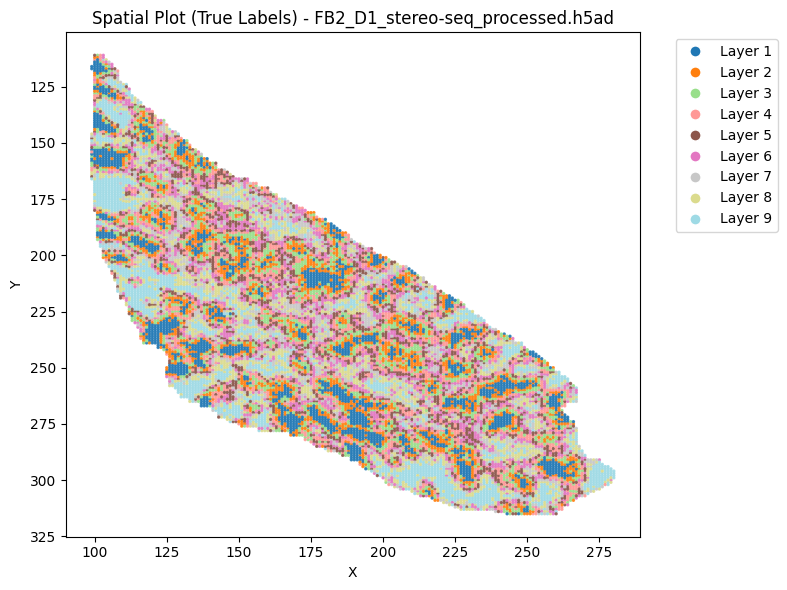

performing baseline clustering..

Base Clustering Run 1...


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [ ]:
# @title main function to run in batches

# Directories
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/visium/DLPFC/
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/
# /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/xyz-seq/

# Datasets Name
"""
visium--> 151507_processed, 151508_processed, 151509_processed, 151510_processed, 151669_processed, 151670_processed, 151671_processed, 151672_processed, 151673_processed, 151674_processed, 151675_processed, 151676_processed

stereoseq--> FB2_D1_stereo-seq_processed.h5ad, DT2_D0_stereo-seq_processed.h5ad, DX6_D2_stereo-seq_processed

xyzseq--> GSM5009529_XYZeq_raw_processed
"""

if __name__ == "__main__":

    dataset_folder = '/content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/'
    output_csv = os.path.join(dataset_folder, "stereo_imputation_results1.csv")
    n_top = ['all', 2000, 5000]
    # n_top = ['all']

    batch_size = 1  # Change this to control how many datasets to process per run
    # n_top_batch_size = 1

    # Get all .h5ad dataset filenames
    all_datasets = sorted([f for f in os.listdir(dataset_folder) if f.endswith('.h5ad')])

    # Get names of already processed datasets from the CSV
    if os.path.exists(output_csv):
        df_done = pd.read_csv(output_csv)
        processed_datasets = set(df_done['Dataset Name'].unique())
        print(processed_datasets)
    else:
        processed_datasets = set()

    # Find remaining datasets to process
    remaining_datasets = [f for f in all_datasets if f not in processed_datasets]
    print(remaining_datasets)

    if not remaining_datasets:
        print("✅ All datasets are already processed and saved in the CSV.\n")
    else:
        print(f"🟡 Found {len(remaining_datasets)} remaining datasets.\n")
        to_process = remaining_datasets[:batch_size]

        for dataset_filename in tqdm(to_process, desc="Processing Datasets in Bath-mode"):
            dataset_path = os.path.join(dataset_folder, dataset_filename)
            all_results = []

            for n in n_top:
              print(f"Analyzing dataset {dataset_filename} for top genes {n}\n")
              df_row = run_on_single_dataset(dataset_path, n_top_genes=n)
              all_results.append(df_row)
            print(f"✔ Analyzing finished for {dataset_filename}\n")
            print(f"save the results for the dataset {dataset_filename} in the csv\n")

            # Merge all DataFrames
            final_df = pd.concat(all_results, ignore_index=True)

            # Sort by Dataset name, then by Top_Genes value
            final_df = final_df.sort_values(by=["Dataset Name", "top_genes"]).reset_index(drop=True)

            # reorder the results
            df_results_reordered = reorder_columns(final_df)

            # Append to CSV
            if os.path.exists(output_csv):
                df_results_reordered.to_csv(output_csv, mode='a', header=False, index=False)
            else:
                df_results_reordered.to_csv(output_csv, index=False)

            print(f"Results saved for the dataset {dataset_filename} in the csv!!\n")



🟡 1 datasets still need processing:
  🔸 FB2_D1_stereo-seq_processed.h5ad: Missing top_genes → ['2000', '5000']



Processing Datasets in Batch-mode:   0%|          | 0/1 [00:00<?, ?it/s]

🔍 Analyzing dataset FB2_D1_stereo-seq_processed.h5ad for top genes 2000

Loading dataset: /content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/FB2_D1_stereo-seq_processed.h5ad
In the Imputation Evaluator the n_top_genes: 2000


Original adata shape: (16263, 19639)
top genes the class got: 2000

type of this var: <class 'int'>

Adata shape after selecting top 2000 genes: (16263, 2000)
True Labels plot for the dataset FB2_D1_stereo-seq_processed.h5ad..



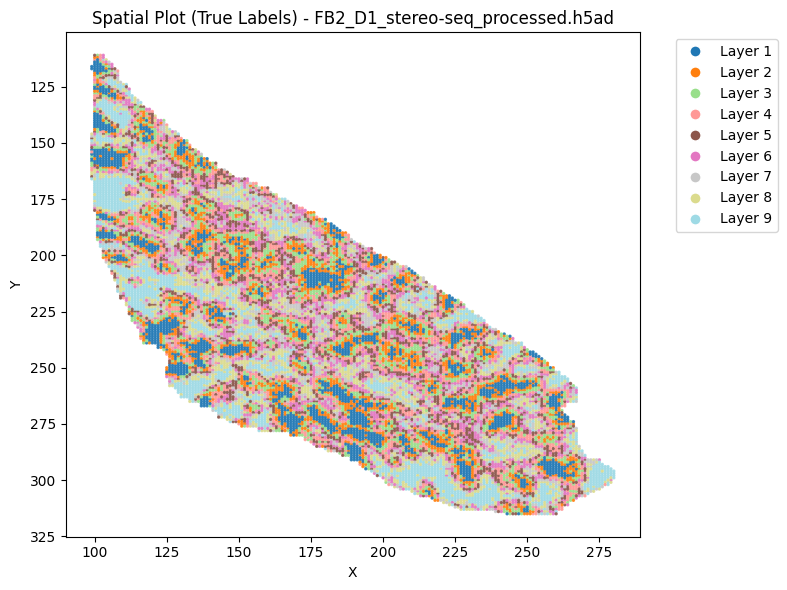

performing baseline clustering..

Base Clustering Run 1...


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
<ipython-input-17-e45420098c47>:94: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added=cluster_key, directed=False, n_iterations=2)


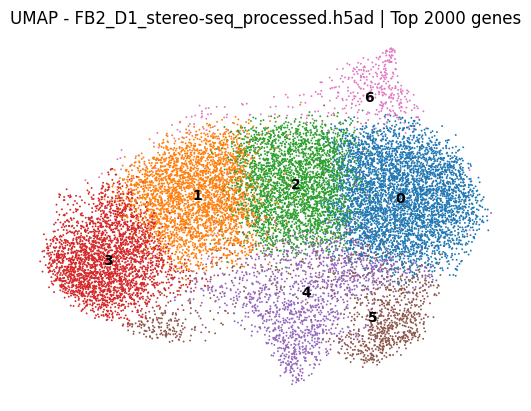

Base Clustering Run 2...


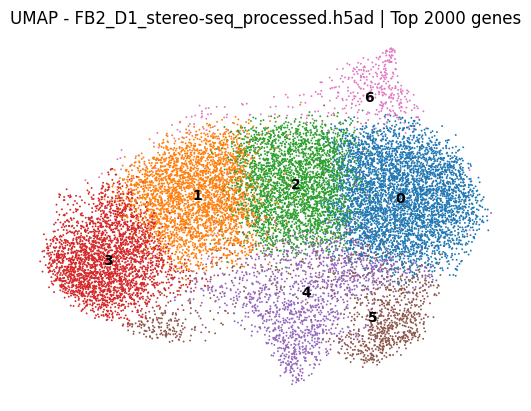

Base Clustering Run 3...


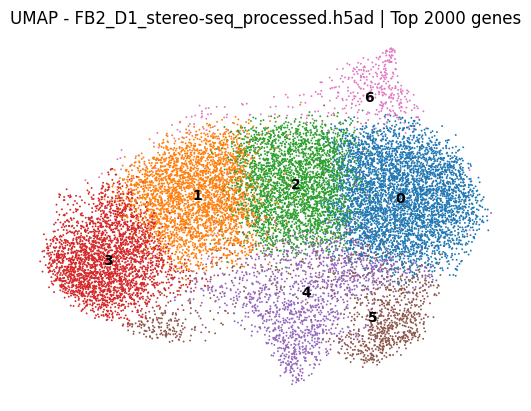

Base Clustering Run 4...


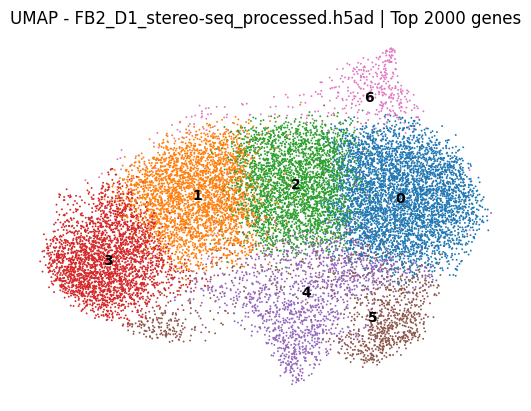

Base Clustering Run 5...


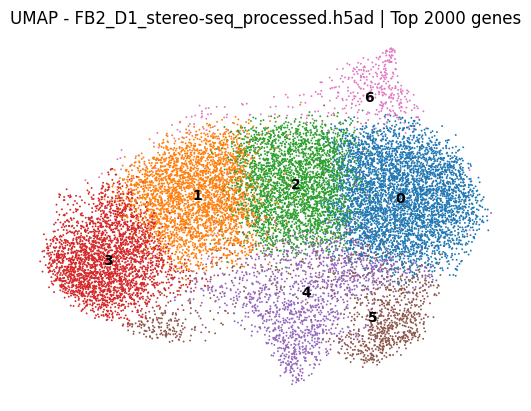


Running Imputations:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 16263 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 6.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 112.64 seconds.
    Calculating affinities...
    Calculated affinities in 110.11 seconds.
  Calculated graph and diffusion operator in 229.26 seconds.
  Calculating imputation...
  Calculated imputation in 5.94 seconds.
Calculated MAGIC in 235.26 seconds.
performing clustering on the magic imputation..

Clustering Run 1...


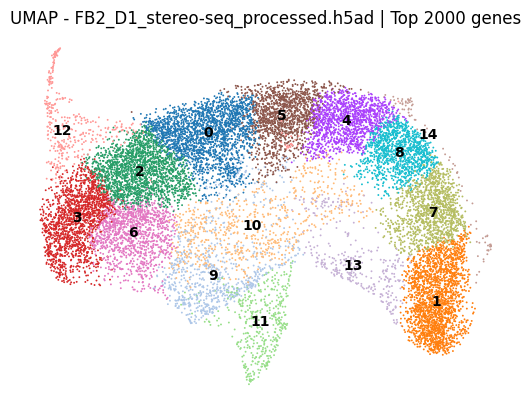

Clustering Run 2...


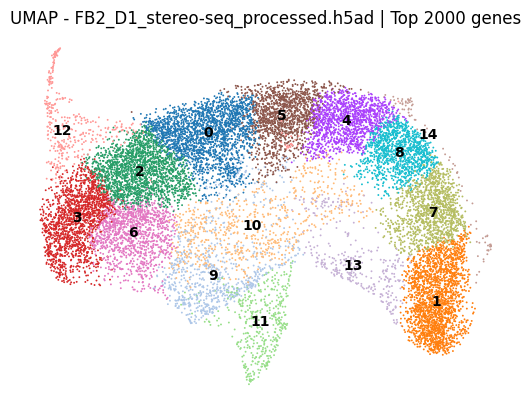

Clustering Run 3...


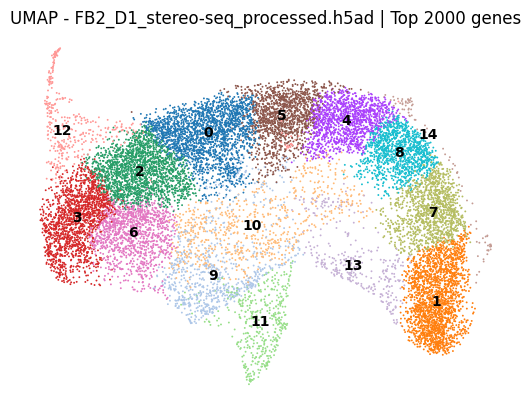

Clustering Run 4...


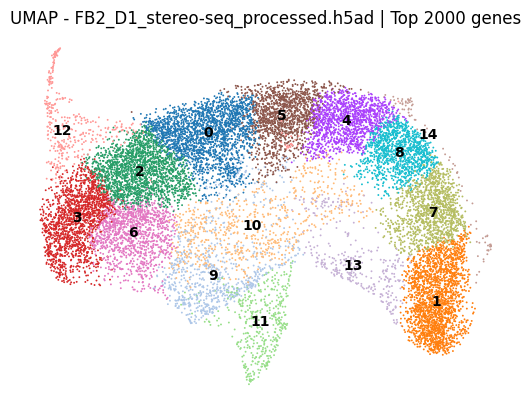

Clustering Run 5...


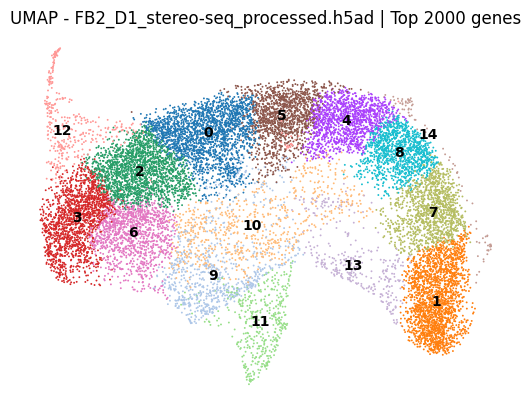


Running Imputations:  50%|█████     | 1/2 [07:26<07:26, 446.36s/it]

performing clustering on the alra imputation..

Clustering Run 1...


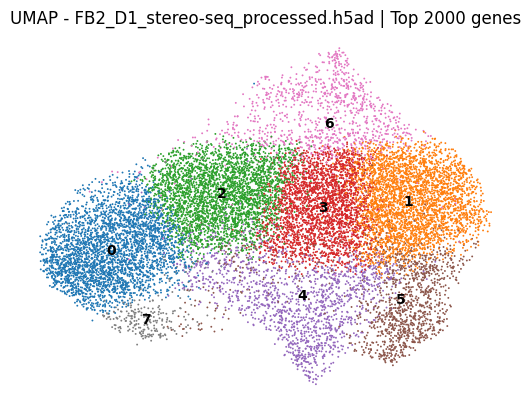

Clustering Run 2...


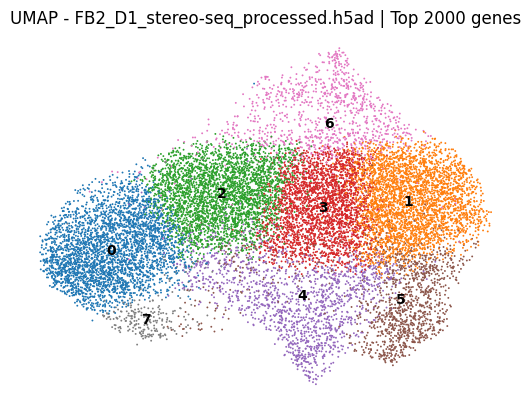

Clustering Run 3...


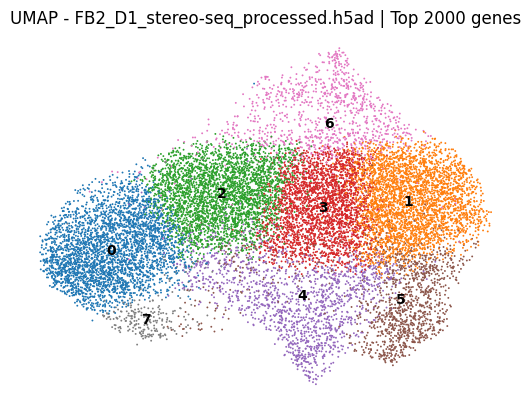

Clustering Run 4...


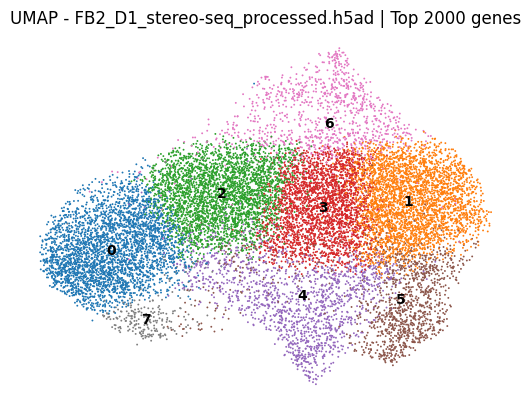

Clustering Run 5...


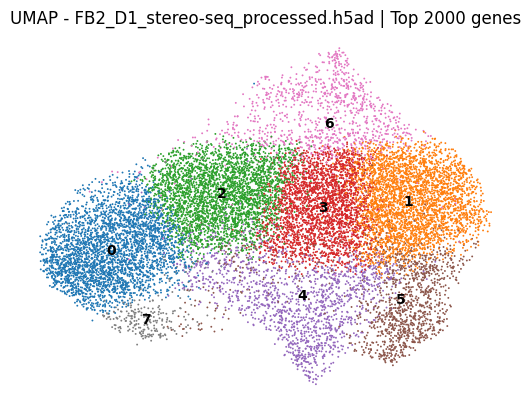


Processing Datasets in Batch-mode: 100%|██████████| 1/1 [16:01<00:00, 961.13s/it]

✅ Results saved for FB2_D1_stereo-seq_processed.h5ad

🔄 Remaining datasets and top_genes still to process:
  🔸 FB2_D1_stereo-seq_processed.h5ad: Missing top_genes → ['5000']


In [18]:
# @title main function to run in multi-batch modes

if __name__ == "__main__":

    dataset_folder = '/content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/'
    output_csv = os.path.join(dataset_folder, "stereo_imputation_results1.csv")

    all_n_top = ['all', 2000, 5000]
    batch_size = 1            # Number of datasets per batch
    n_top_batch_size = 1      # Number of top_genes values per dataset per batch

    all_datasets = sorted([f for f in os.listdir(dataset_folder) if f.endswith('.h5ad')])

    # Load already processed entries
    processed_map = {}
    if os.path.exists(output_csv):
        df_done = pd.read_csv(output_csv)
        for dataset in df_done['Dataset Name'].unique():
            processed_tops = set(df_done[df_done['Dataset Name'] == dataset]['top_genes'].astype(str))
            processed_map[dataset] = processed_tops
    else:
        df_done = pd.DataFrame()
        processed_map = {}

    # Build dictionary of work to be done
    work_dict = {}
    for fname in all_datasets:
        dataset_name = fname
        done_tops = processed_map.get(dataset_name, set())
        remaining_tops = [str(t) for t in all_n_top if str(t) not in done_tops]
        if remaining_tops:
            work_dict[dataset_name] = remaining_tops

    # Print all pending work
    if not work_dict:
        print("✅ All datasets and top_genes combinations are already processed.\n")
    else:
        print(f"🟡 {len(work_dict)} datasets still need processing:")
        for k, v in work_dict.items():
            print(f"  🔸 {k}: Missing top_genes → {v}")
        print()

    # Select datasets to process
    selected_datasets = list(work_dict.keys())[:batch_size]

    for dataset_filename in tqdm(selected_datasets, desc="Processing Datasets in Batch-mode"):
        dataset_path = os.path.join(dataset_folder, dataset_filename)
        remaining_tops = work_dict[dataset_filename]

        # Handle smaller-than-batch case safely
        top_genes_list = remaining_tops[:n_top_batch_size] if len(remaining_tops) >= n_top_batch_size else remaining_tops

        all_results = []
        for n in top_genes_list:
            print(f"🔍 Analyzing dataset {dataset_filename} for top genes {n}")
            df_row = run_on_single_dataset(dataset_path, n_top_genes=n)
            all_results.append(df_row)

        if all_results:
            final_df = pd.concat(all_results, ignore_index=True)
            final_df = final_df.sort_values(by=["Dataset Name", "top_genes"]).reset_index(drop=True)
            df_results_reordered = reorder_columns(final_df)

            if os.path.exists(output_csv):
                df_results_reordered.to_csv(output_csv, mode='a', header=False, index=False)

                # Reload entire CSV and sort
                full_df = pd.read_csv(output_csv)
                full_df = full_df.sort_values(by=["Dataset Name", "top_genes"]).reset_index(drop=True)
                full_df = reorder_columns(full_df)
                full_df.to_csv(output_csv, index=False)

            else:
                df_results_reordered.to_csv(output_csv, index=False)

            print(f"✅ Results saved for {dataset_filename}\n")

    # 🔁 Print remaining work again after processing
    print("🔄 Remaining datasets and top_genes still to process:")
    updated_processed = set()
    if os.path.exists(output_csv):
        updated_df = pd.read_csv(output_csv)
        updated_processed_map = {
            dataset: set(updated_df[updated_df['Dataset Name'] == dataset]['top_genes'].astype(str))
            for dataset in updated_df['Dataset Name'].unique()
        }
        for fname in all_datasets:
            done_tops = updated_processed_map.get(fname, set())
            still_pending = [str(t) for t in all_n_top if str(t) not in done_tops]
            if still_pending:
                print(f"  🔸 {fname}: Missing top_genes → {still_pending}")
    else:
        print("⚠ CSV not found after run, no updates made.")


In [ ]:
# @title parser for further enhancement
# if __name__ == "__main__":
#     import argparse

#     parser = argparse.ArgumentParser()
#     parser.add_argument('--folder', required=True, help='Path to folder containing .h5ad files')
#     parser.add_argument('--top_genes', type=int, default=2000, help='Number of top highly variable genes')
#     parser.add_argument('--output', default='imputation_results.csv', help='Output CSV filename')
#     args = parser.parse_args()

#     run_on_multiple_datasets(args.folder, output_csv=args.output, n_top_genes=args.top_genes)

# python evaluate_imputation.py --folder ./datasets --top_genes 3000 --output result.csv


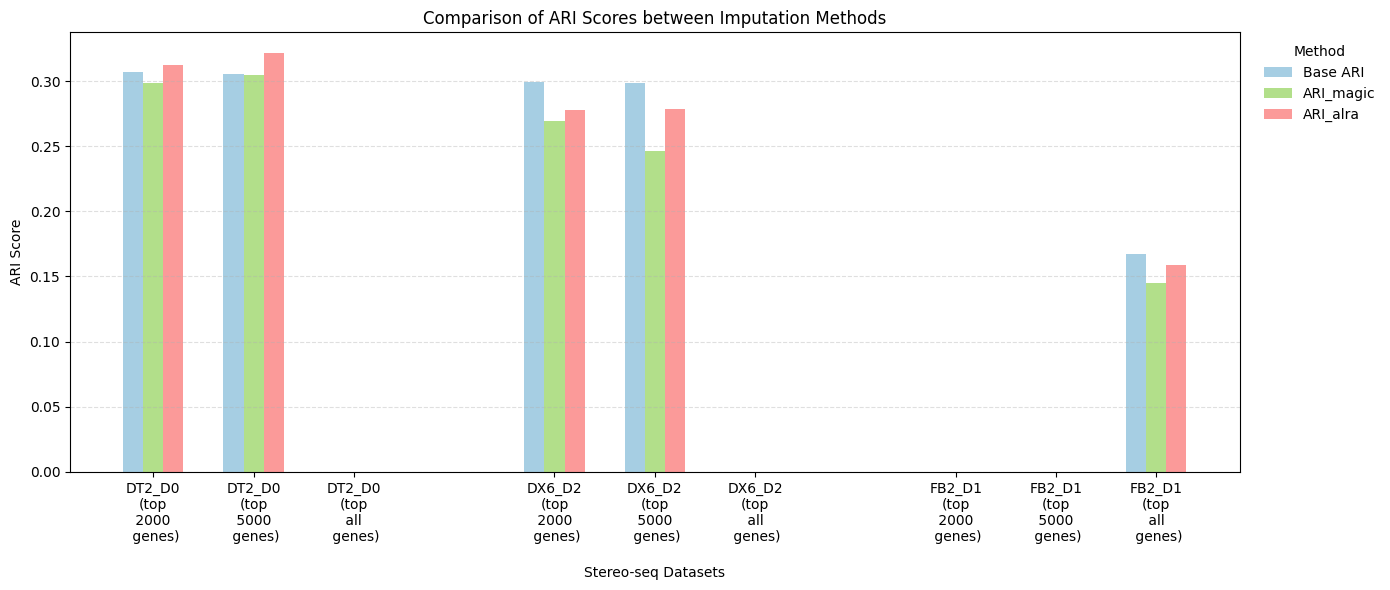

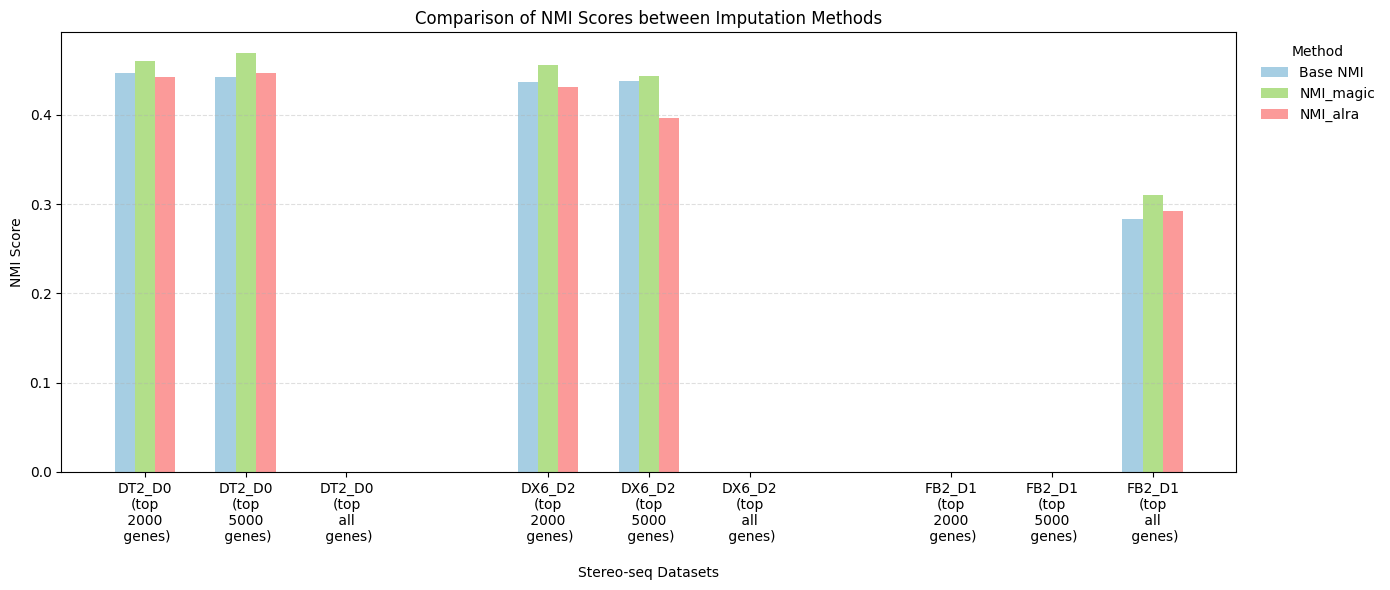

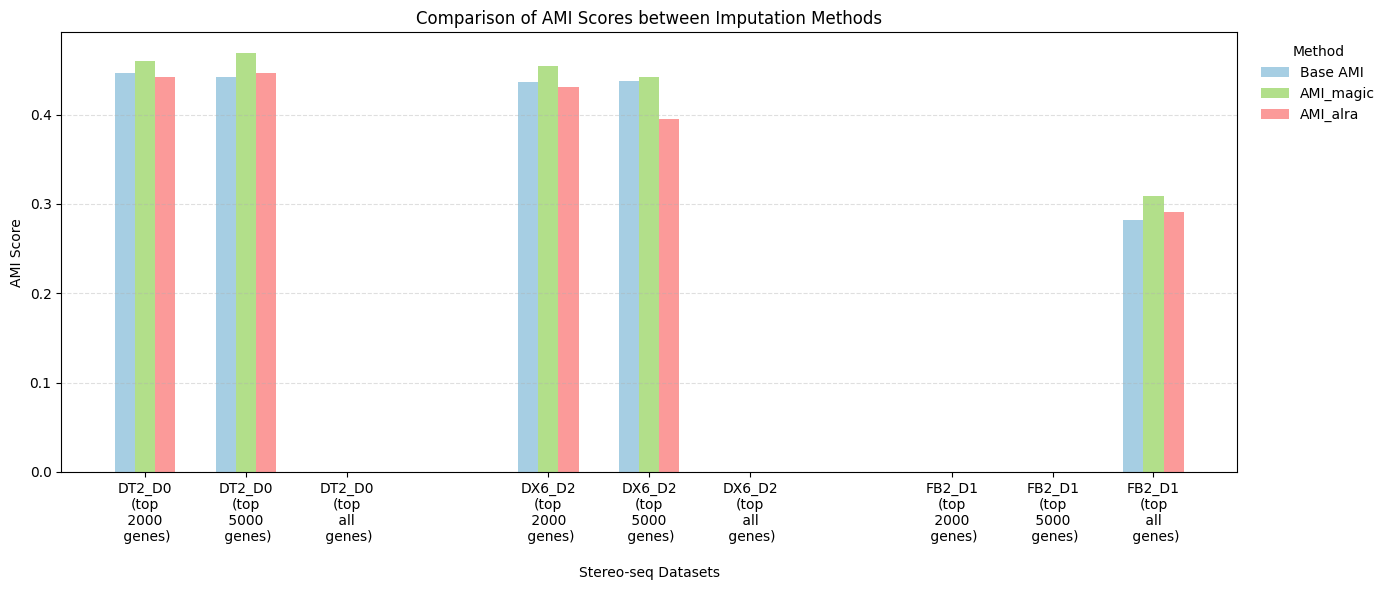

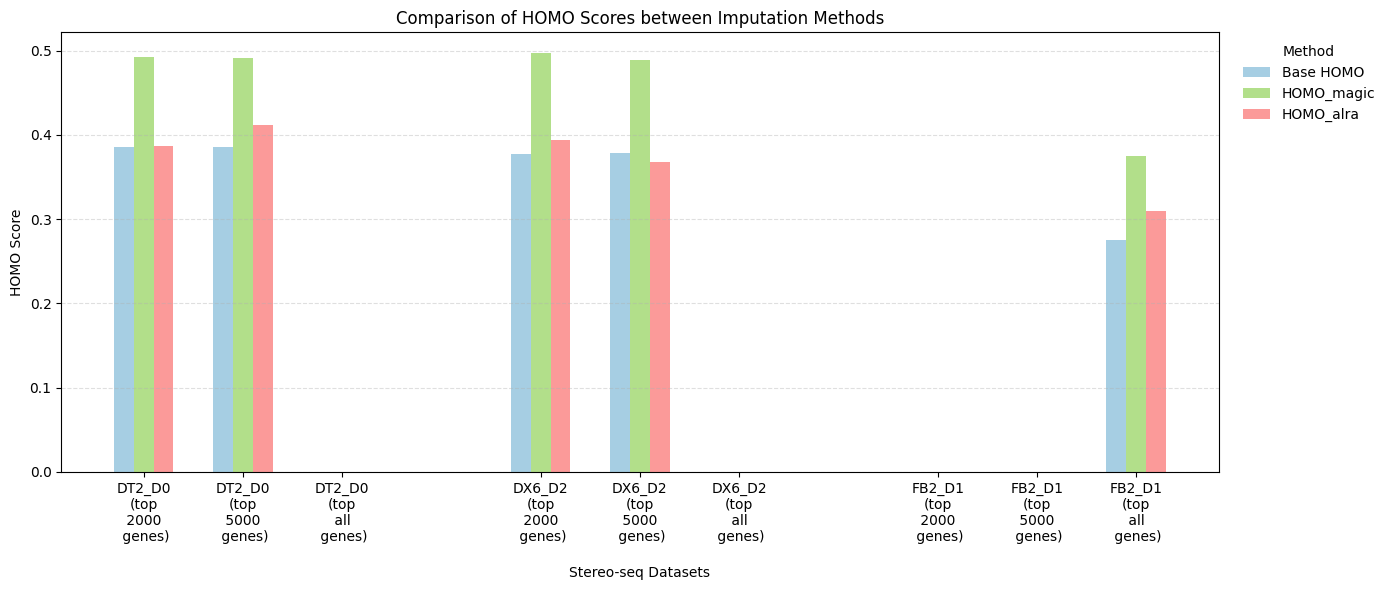

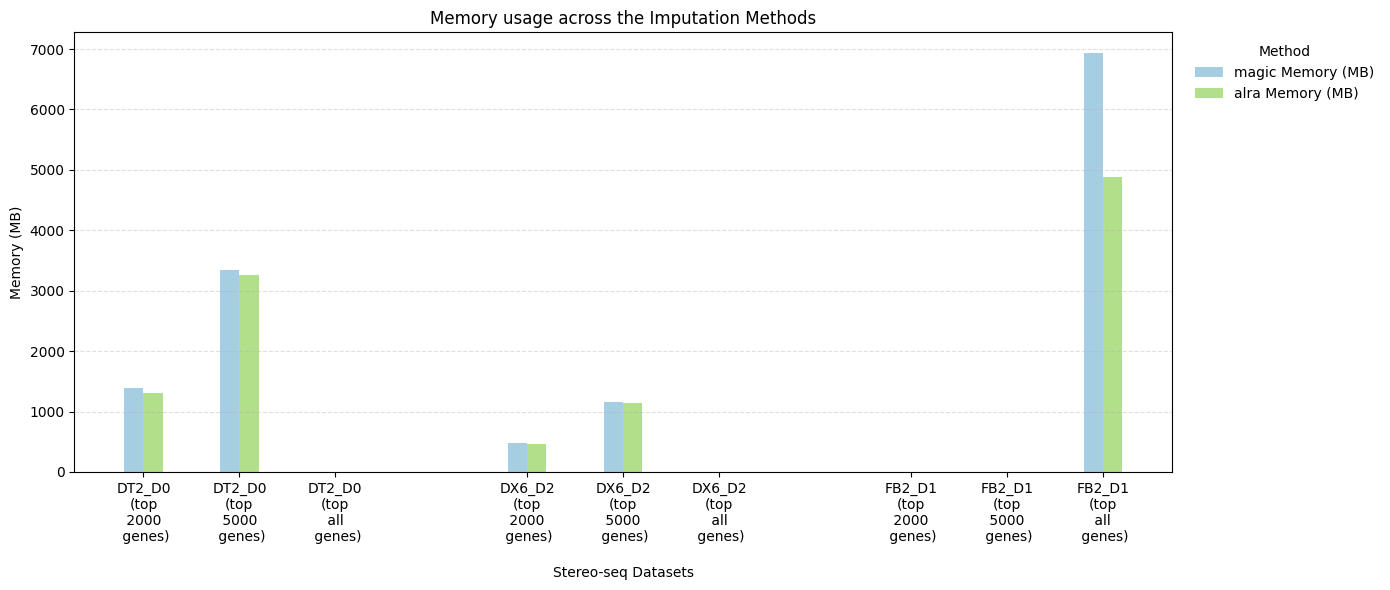

In [ ]:
# @title plotting the results

output_csv_path = "/content/drive/MyDrive/UIU/MSCSE/Thesis/05. Codes and Datasets/ST_datasets/stereo-seq/stereo_imputation_results1.csv"

# ARI plot
plot_imputation_comparison_barplot(
    csv_path=output_csv_path,
    metric_keywords=["ARI"],  # Could also be ["NMI", "Base NMI"]
    dataset_col="Dataset Name", top_gene_col="top_genes", remove_suffix="_stereo-seq_processed.h5ad",
    ylabel="ARI Score", xlabel="Stereo-seq Datasets",
    title="Comparison of ARI Scores between Imputation Methods", xtick_offset=0.0, img_name="stereo-seq_imputation_comparison_ARI.png"
)

# NMI plot
plot_imputation_comparison_barplot(
    csv_path=output_csv_path,
    metric_keywords=["NMI"],  # Could also be ["NMI", "Base NMI"]
    dataset_col="Dataset Name", top_gene_col="top_genes", remove_suffix="_stereo-seq_processed.h5ad",
    ylabel="NMI Score", xlabel="Stereo-seq Datasets",
    title="Comparison of NMI Scores between Imputation Methods", xtick_offset=0.0, img_name="stereo-seq_imputation_comparison_NMI.png"
)

# AMI plot
plot_imputation_comparison_barplot(
    csv_path=output_csv_path,
    metric_keywords=["AMI"],  # Could also be ["NMI", "Base NMI"]
    dataset_col="Dataset Name", top_gene_col="top_genes", remove_suffix="_stereo-seq_processed.h5ad",
    ylabel="AMI Score", xlabel="Stereo-seq Datasets",
    title="Comparison of AMI Scores between Imputation Methods", xtick_offset=0.0, img_name="stereo-seq_imputation_comparison_AMI.png"
)

# HOMO plot
plot_imputation_comparison_barplot(
    csv_path=output_csv_path,
    metric_keywords=["HOMO"],  # Could also be ["NMI", "Base NMI"]
    dataset_col="Dataset Name", top_gene_col="top_genes", remove_suffix="_stereo-seq_processed.h5ad",
    ylabel="HOMO Score", xlabel="Stereo-seq Datasets",
    title="Comparison of HOMO Scores between Imputation Methods", xtick_offset=0.0, img_name="stereo-seq_imputation_comparison_HOMO.png"
)

# Memory plot
plot_imputation_comparison_barplot(
    csv_path=output_csv_path,
    metric_keywords=["Memory"],  # Could also be ["NMI", "Base NMI"]
    dataset_col="Dataset Name", top_gene_col="top_genes", remove_suffix="_stereo-seq_processed.h5ad",
    ylabel="Memory (MB)", xlabel="Stereo-seq Datasets",
    title="Memory usage across the Imputation Methods", xtick_offset=0.0, img_name="stereo-seq_imputation_comparison_memory.png"
)
